In [115]:
import cv2
import numpy as np 

import matplotlib.pyplot as plt 

In [116]:
def show_image(img, title=None):
    plt.figure(figsize = (10,8))
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')

In [117]:
im1 = cv2.imread('diff1.png') # this image will be transformed         
im2 = cv2.imread('diff2.png')  # this image will be used as a reference 

In [118]:
if im1.shape != im2.shape:
    im1 = cv2.resize(im1, im2.shape[:2][::-1])

In [119]:
gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Align the images

In [120]:
orb = cv2.ORB_create(5000)  

In [121]:
kp1, des1 = orb.detectAndCompute(gray1, None)  #kp1 --> list of keypoints
kp2, des2 = orb.detectAndCompute(gray2, None)

In [122]:
result1 = cv2.drawKeypoints(np.copy(im1), kp1, None)
result2 = cv2.drawKeypoints(np.copy(im2), kp2, None)

(-0.5, 301.5, 408.5, -0.5)

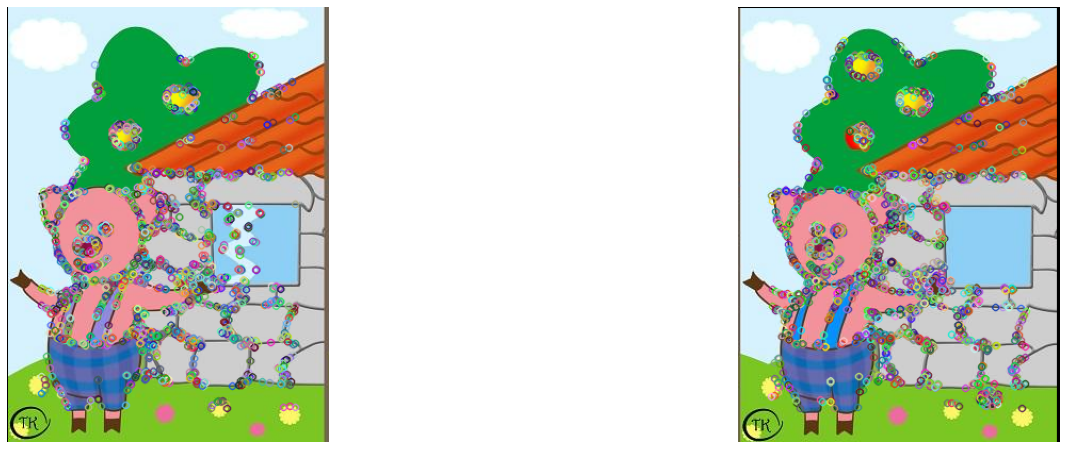

In [123]:
plt.figure(figsize = (24,8))
plt.subplot(121)
plt.imshow(result1[:,:,::-1])
plt.axis('off')

plt.subplot(122)
plt.imshow(result2[:,:,::-1])
plt.axis('off')

In [124]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Match descriptors.
matches = matcher.match(des1, des2, None) 

In [125]:
matches = sorted(matches, key = lambda x:x.distance)


In [126]:
result3 = cv2.drawMatches(np.copy(im1),kp1, np.copy(im2), kp2, matches[:10], None)


(-0.5, 603.5, 408.5, -0.5)

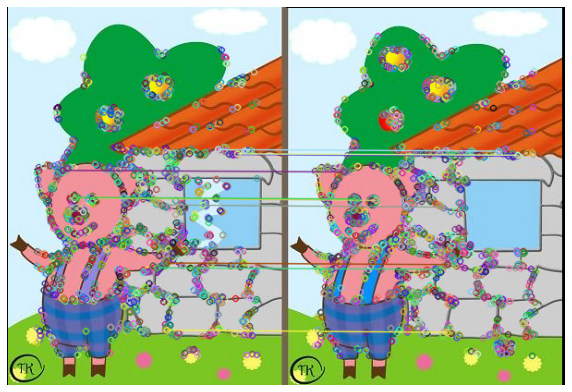

In [127]:
plt.figure(figsize = (10,8))
plt.imshow(result3[:,:,::-1])
plt.axis('off')

In [128]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)  #Prints empty array of size equal to (matches, 2)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

In [129]:
for i, match in enumerate(matches):
   points1[i, :] = kp1[match.queryIdx].pt    #gives index of the descriptor in the list of query descriptors
   points2[i, :] = kp2[match.trainIdx].pt    #gives index of the descriptor in the list of train descriptors

In [130]:
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
  # Use homography
height, width, channels = im2.shape
im1Reg = cv2.warpPerspective(im1, h, (width, height))  #Applies a perspective transformation to an image (img_1)

(-0.5, 301.5, 408.5, -0.5)

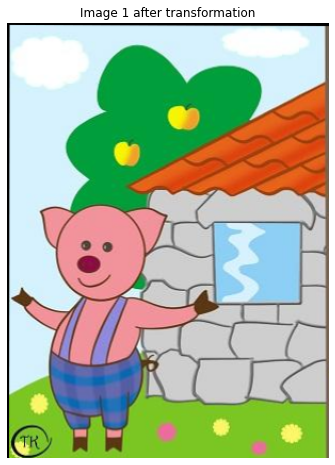

In [131]:
plt.figure(figsize = (10,8))
plt.imshow(im1Reg[:,:,::-1])
plt.title("Image 1 after transformation")
plt.axis('off')

(-0.5, 301.5, 408.5, -0.5)

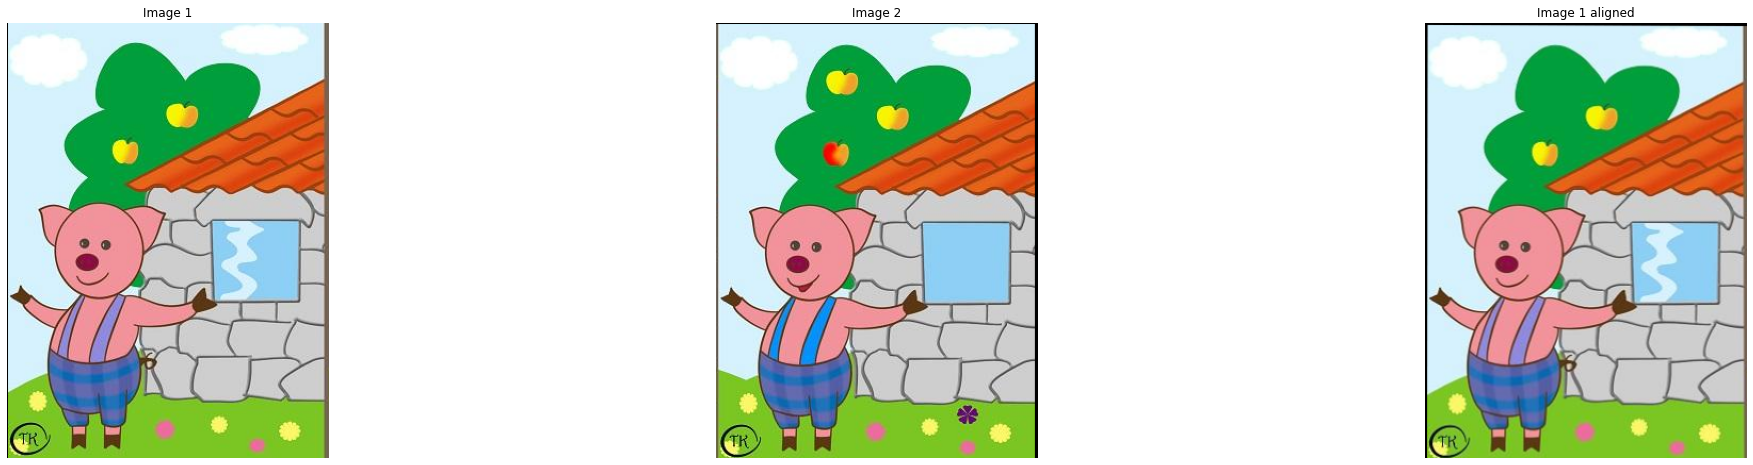

In [132]:
plt.figure(figsize = (36,8))
plt.subplot(131)
plt.imshow(im1[:,:,::-1])
plt.title("Image 1")
plt.axis('off')

plt.subplot(132)
plt.imshow(im2[:,:,::-1])
plt.title("Image 2")
plt.axis('off')

plt.subplot(133)
plt.imshow(im1Reg[:,:,::-1])
plt.title("Image 1 aligned")
plt.axis('off')

In [133]:
print(im1.shape)
print(im2.shape)
print(im1Reg.shape)

(409, 302, 3)
(409, 302, 3)
(409, 302, 3)


### Check the difference between image1,image2 and image1(aligned),image2

In [134]:
sub1 = cv2.subtract(im1, im2)
sub2 = cv2.subtract(im1Reg, im2)

Text(0.5, 1.0, 'Difference after alignment')

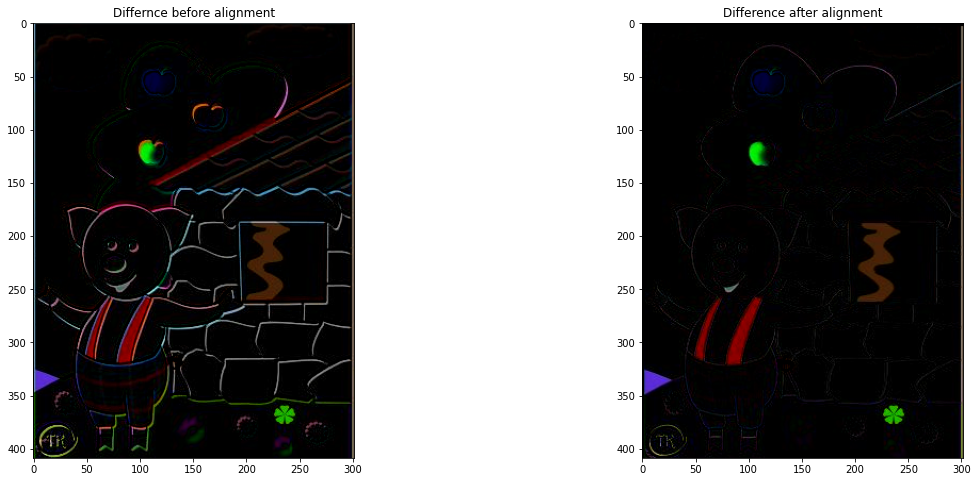

In [135]:
plt.figure(figsize = (20,8))

plt.subplot(121)
plt.imshow(sub1[:,:,::-1])
plt.title("Differnce before alignment")

plt.subplot(122)
plt.imshow(sub2[:,:,::-1])
plt.title("Difference after alignment")

### Get contours 

In [163]:
# convert the image to grayscale
imgGray = cv2.cvtColor(sub2, cv2.COLOR_BGR2GRAY)

In [256]:
# convert the gray scale image to threshold image 
# I tried using contours with grayscale image, which were giving around 4,000 contours

# this will be a hyperparameter
THRSHOLD_VALUE = 20
ret, thrsh = cv2.threshold(imgGray,THRSHOLD_VALUE,255,cv2.THRESH_OTSU)

(-0.5, 301.5, 408.5, -0.5)

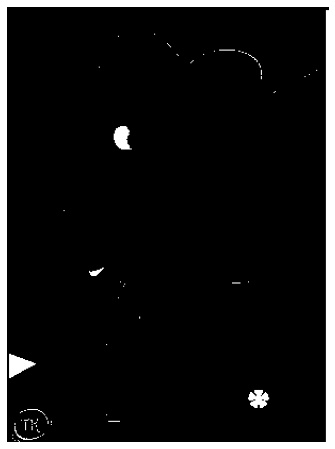

In [258]:
plt.figure(figsize = (12,8))
plt.imshow(thrsh, cmap="gray")
plt.axis('off')

In [259]:
contours, hierarchy = cv2.findContours(thrsh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [260]:
print("Number of contours - ",len(contours))

Number of contours -  64


See what the result looks like 

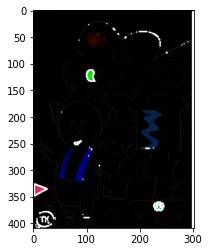

In [261]:
plt.imshow(cv2.drawContours(np.copy(sub2), contours, -1, (255,255,255), 2))

In [262]:
sorted_conts = sorted(contours, key = cv2.contourArea, reverse=True)

In [263]:
print("After sorting, number of contours - ", len(sorted_conts))

After sorting, number of contours -  64


Get k most biggest contours

In [264]:
k = 5

In [265]:
sorted_conts_k = sorted_conts[:k]

Draw the k contours 

(-0.5, 301.5, 408.5, -0.5)

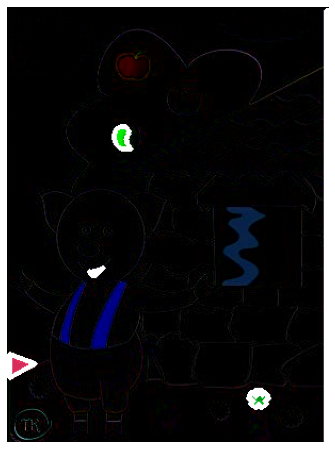

In [266]:
plt.figure(figsize = (12,8))
plt.imshow(cv2.drawContours(np.copy(sub2), sorted_conts_k, -1, (255,255,255), 3))
plt.axis('off')

We have the right contours, now we need to draw the circiles outside the selected contours

In [267]:
result_1 = im1.copy()
result_2 = im2.copy()

for c in sorted_conts_k:       
    poly = cv2.approxPolyDP(c, 3, True)
    center, radius = cv2.minEnclosingCircle(poly)
    # cv2.circle accepts circle as int 
    center = (int(center[0]), int(center[1])) 
    cv2.circle(result_1, center, int(radius), (0,0,255), 2)
    cv2.circle(result_2, center, int(radius), (0,0,255), 2)

(-0.5, 301.5, 408.5, -0.5)

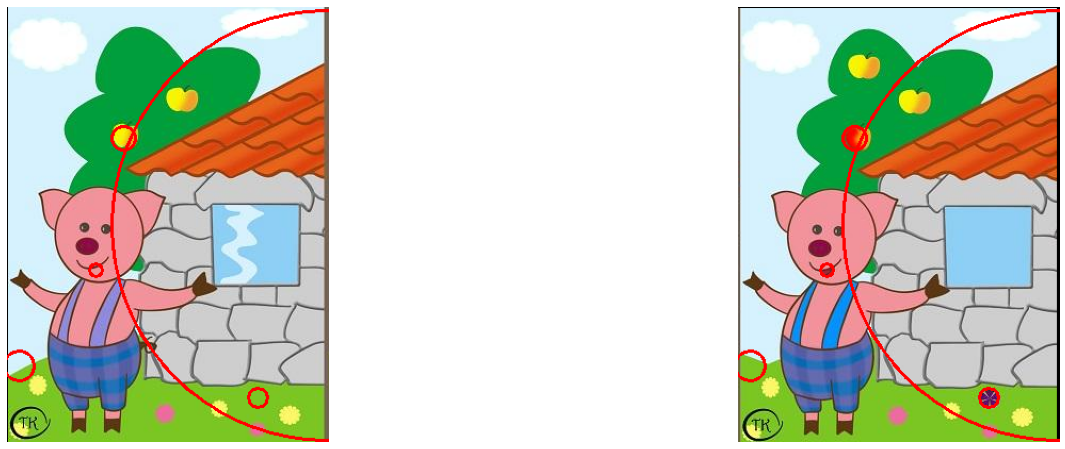

In [268]:
plt.figure(figsize = (24,8))

plt.subplot(121)
plt.imshow(result_1[:,:,::-1])
plt.axis('off')

plt.subplot(122)
plt.imshow(result_2[:,:,::-1])
plt.axis('off')

Need to reomve the boundary contours

In [269]:
def isBorderCont(cnt,img):
    M = cv2.moments(cnt)
    x = int(M["m10"] / M["m00"])
    y = int(M["m01"] / M["m00"])
    h,w, _ = img.shape
    if x/w > 0.98:
        return True 
    elif x/w < 0.02:
        return True 
    elif y/h>0.98:
        return True 
    elif y/h < 0.02:
        return True 
    else:
        return False 

In [270]:
removed_border_cnts = []
for cnt in sorted_conts_k:
    if not isBorderCont(cnt, sub2):
        removed_border_cnts.append(cnt)

In [271]:
print("Number of cnts before removing border cnts - ", len(sorted_conts_k))

Number of cnts before removing border cnts -  5


In [272]:
print("Number of cnts after removing border cnts - ",len(removed_border_cnts))

Number of cnts after removing border cnts -  4


(-0.5, 301.5, 408.5, -0.5)

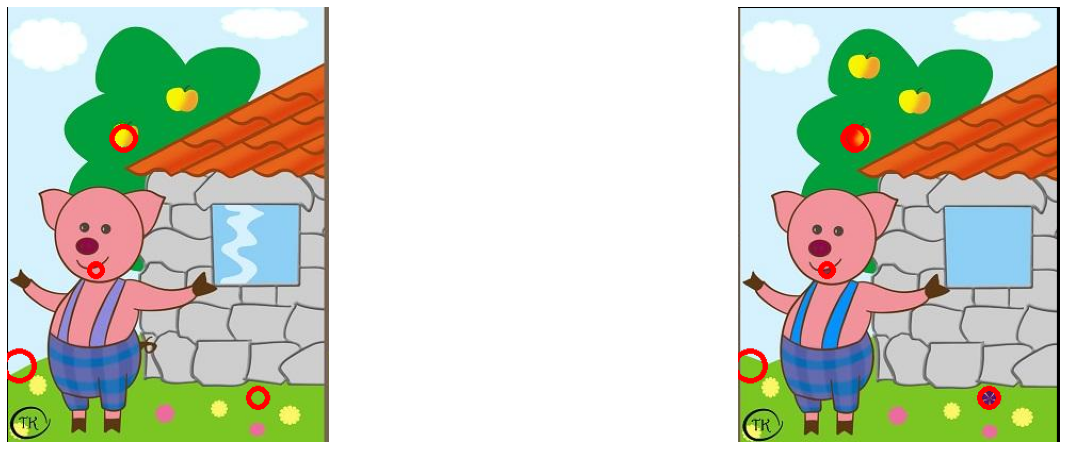

In [273]:
result_1 = im1.copy()
result_2 = im2.copy()

for c in removed_border_cnts:       
    poly = cv2.approxPolyDP(c, 3, True)
    center, radius = cv2.minEnclosingCircle(poly)
    # cv2.circle accepts circle as int 
    center = (int(center[0]), int(center[1])) 
    cv2.circle(result_1, center, int(radius), (0,0,255), 4)
    cv2.circle(result_2, center, int(radius), (0,0,255), 4)

plt.figure(figsize = (24,8))

plt.subplot(121)
plt.imshow(result_1[:,:,::-1])
plt.axis('off')

plt.subplot(122)
plt.imshow(result_2[:,:,::-1])
plt.axis('off')

In [278]:
final_result = np.concatenate((result_1, result_2), axis=1)
cv2.imwrite('results/bear.png', final_result)

True

## New method 

(-0.5, 301.5, 408.5, -0.5)

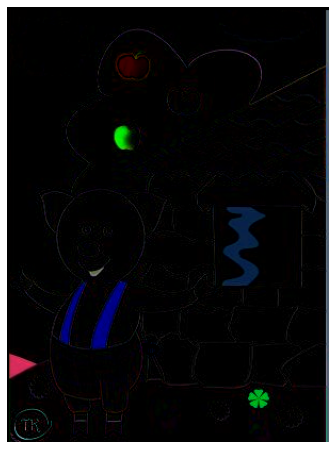

In [280]:
plt.figure(figsize = (12,8))
plt.imshow(sub2)
plt.axis('off')

I am looking for a better way to extract the coloured points from the above image 

Earlier I converted it to gray image and tried to get contours from it, now I will try a different method. Instead of converting it to grayscale, I will try to convert 3 channel image to 1 channel image by taking the maximum of each pixel.

In [310]:
b,g,r = cv2.split(sub2)

In [311]:
print(b.shape)

(409, 302)


In [312]:
img_max = np.max((b,g,r), axis=0)

In [313]:
img_max.shape

(409, 302)

(-0.5, 301.5, 408.5, -0.5)

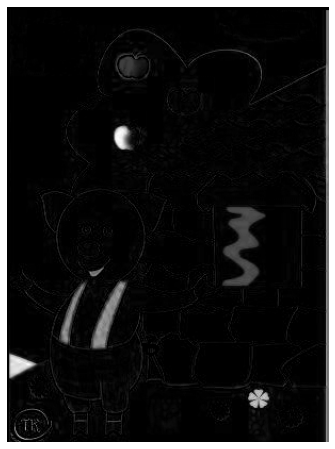

In [314]:
plt.figure(figsize = (12,8))
plt.imshow(img_max, cmap="gray")
plt.axis('off')

58.0


(-0.5, 301.5, 408.5, -0.5)

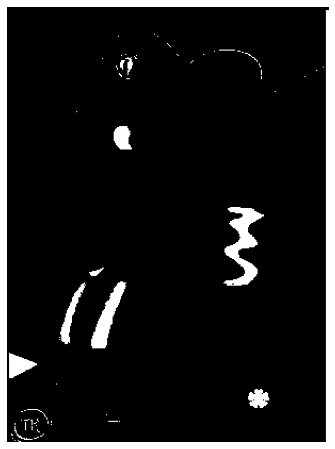

In [315]:
ret, thrsh = cv2.threshold(img_max, 127, 255, cv2.THRESH_OTSU)

print(ret)
plt.figure(figsize = (12,8))
plt.imshow(thrsh, cmap="gray")
plt.axis('off')

In [316]:
contours, hierarchy = cv2.findContours(thrsh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [317]:
print("Number of contours - ",len(contours))

Number of contours -  72


See what the result looks like 

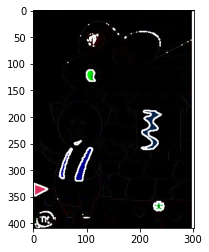

In [318]:
plt.imshow(cv2.drawContours(np.copy(sub2), contours, -1, (255,255,255), 2))

In [319]:
sorted_conts = sorted(contours, key = cv2.contourArea, reverse=True)

In [320]:
print("After sorting, number of contours - ", len(sorted_conts))

After sorting, number of contours -  72


Get k most biggest contours

In [321]:
k = 10

In [322]:
sorted_conts_k = sorted_conts[:k]

Draw the k contours 

(-0.5, 301.5, 408.5, -0.5)

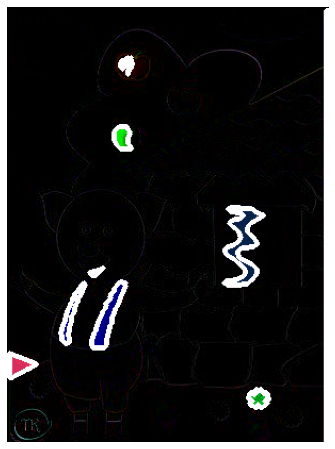

In [323]:
plt.figure(figsize = (12,8))
plt.imshow(cv2.drawContours(np.copy(sub2), sorted_conts_k, -1, (255,255,255), 3))
plt.axis('off')

We have the right contours, now we need to draw the circiles outside the selected contours

In [324]:
result_1 = im1.copy()
result_2 = im2.copy()

for c in sorted_conts_k:       
    poly = cv2.approxPolyDP(c, 3, True)
    center, radius = cv2.minEnclosingCircle(poly)
    # cv2.circle accepts circle as int 
    center = (int(center[0]), int(center[1])) 
    cv2.circle(result_1, center, int(radius), (0,0,255), 2)
    cv2.circle(result_2, center, int(radius), (0,0,255), 2)

(-0.5, 301.5, 408.5, -0.5)

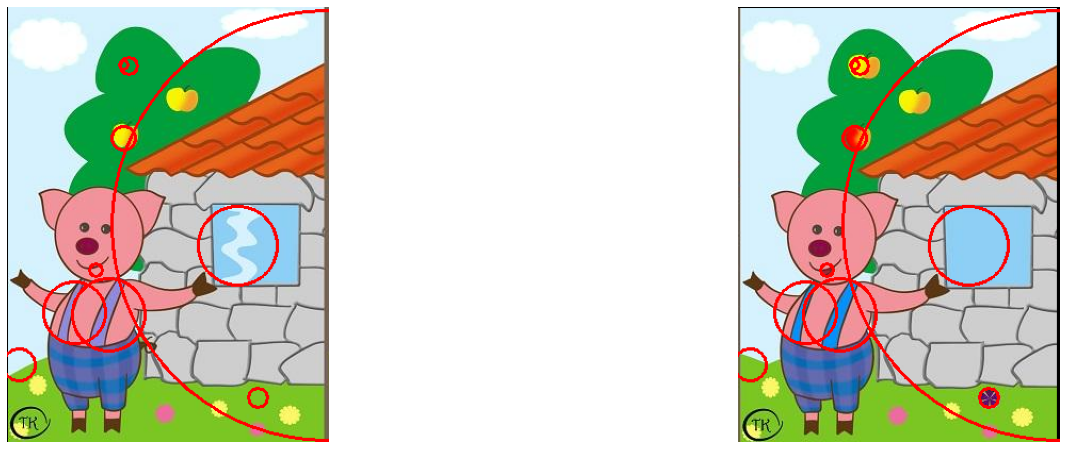

In [325]:
plt.figure(figsize = (24,8))

plt.subplot(121)
plt.imshow(result_1[:,:,::-1])
plt.axis('off')

plt.subplot(122)
plt.imshow(result_2[:,:,::-1])
plt.axis('off')

Need to reomve the boundary contours

In [326]:
def isBorderCont(cnt,img):
    M = cv2.moments(cnt)
    x = int(M["m10"] / M["m00"])
    y = int(M["m01"] / M["m00"])
    h,w, _ = img.shape
    if x/w > 0.98:
        return True 
    elif x/w < 0.02:
        return True 
    elif y/h>0.98:
        return True 
    elif y/h < 0.02:
        return True 
    else:
        return False 

In [327]:
removed_border_cnts = []
for cnt in sorted_conts_k:
    if not isBorderCont(cnt, sub2):
        removed_border_cnts.append(cnt)

In [328]:
print("Number of cnts before removing border cnts - ", len(sorted_conts_k))

Number of cnts before removing border cnts -  10


In [329]:
print("Number of cnts after removing border cnts - ",len(removed_border_cnts))

Number of cnts after removing border cnts -  9


(-0.5, 301.5, 408.5, -0.5)

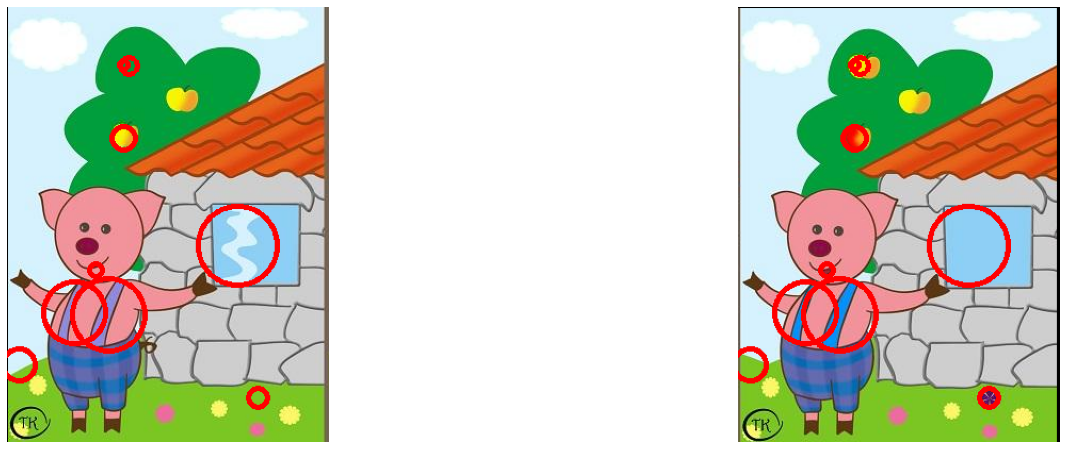

In [330]:
result_1 = im1.copy()
result_2 = im2.copy()

for c in removed_border_cnts:       
    poly = cv2.approxPolyDP(c, 3, True)
    center, radius = cv2.minEnclosingCircle(poly)
    # cv2.circle accepts circle as int 
    center = (int(center[0]), int(center[1])) 
    cv2.circle(result_1, center, int(radius), (0,0,255), 4)
    cv2.circle(result_2, center, int(radius), (0,0,255), 4)

plt.figure(figsize = (24,8))

plt.subplot(121)
plt.imshow(result_1[:,:,::-1])
plt.axis('off')

plt.subplot(122)
plt.imshow(result_2[:,:,::-1])
plt.axis('off')

In [309]:
final_result = np.concatenate((result_1, result_2), axis=1)
cv2.imwrite('results/bear2.png', final_result)

True

This above method gives the better result then what I had earlier used :D 